In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Square error loss function
def square_error_loss(target, output):
    return (target - output) ** 2


In [20]:
data = pd.read_csv("C:\\Users\\shath\\Downloads\\moonDataset.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
weights = {'W1': 0.2, 'W2': -0.3, 'W3': 0.4, 'W4': 0.1, 'W5': -0.5, 'W6': 0.2, 'W7': -0.3, 'W8': -0.2}
biases = {'b1': -0.4, 'b2': 0.2, 'b3': 0.1}
lr = 0.1
epochs = int(input("inter number of epochs"))
loss_values = []


inter number of epochs 20


In [21]:

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X)):
        # Extract the current example's features and label
        x1, x2, x3, target = X[i][0], X[i][1], X[i][2], y[i]
        
        # Forward pass
        h1 = weights['W1']*x1 + weights['W2']*x2 + weights['W3']*x3 + biases['b1']
        h2 = weights['W4']*x1 + weights['W5']*x2 + weights['W6']*x3 + biases['b2']
        s1 = sigmoid(h1)
        s2 = sigmoid(h2)
        out = weights['W7']*s1 + weights['W8']*s2 + biases['b3']
        outs = sigmoid(out)
        
        # Compute loss for the current example and add it to the epoch loss
        loss = square_error_loss(target, outs)
        epoch_loss += loss
        
        # Backpropagation
        error =  -2* (target - outs)
        derivative_out = error * sigmoid_derivative(outs)
        
        # Update weights and biases for output layer
        weights['W7'] -= lr * derivative_out * s1
        weights['W8'] -= lr * derivative_out * s2
        biases['b3'] -=lr * derivative_out
        
        # Calculate error for each neuron in the hidden layer
        derivative_net_h1 = weights['W7'] * derivative_out
        derivative_net_h2 = weights['W8'] * derivative_out
        
        # Calculate the derivative of the loss with respect to z1 and z2
        derivative_h1 = derivative_net_h1 * sigmoid_derivative(s1)
        derivative_h2 = derivative_net_h2 * sigmoid_derivative(s2)
        
        # Update weights and biases for hidden layer
        weights['W1'] -= lr * derivative_h1 * x1
        weights['W2'] -= lr * derivative_h1 * x2
        weights['W3'] -= lr * derivative_h1 * x3
        weights['W4'] -= lr * derivative_h2 * x1
        weights['W5'] -= lr * derivative_h2 * x2
        weights['W6'] -= lr * derivative_h2 * x3
        biases['b1'] -= lr * derivative_h1
        biases['b2'] -= lr * derivative_h2
    # Calculate average loss for the epoch
    average_loss = epoch_loss / len(X)
    loss_values.append(average_loss)



'\nprint("Final Weights:")\nprint("W1 =", weights[\'W1\'])\nprint("W2 =", weights[\'W2\'])\nprint("W3 =", weights[\'W3\'])\nprint("W4 =", weights[\'W4\'])\nprint("W5 =", weights[\'W5\'])\nprint("W6 =", weights[\'W6\'])\nprint("W7 =", weights[\'W7\'])\nprint("W8 =", weights[\'W8\'])\n\nprint("Final Biases:")\nprint("b1 =", biases[\'b1\'])\nprint("b2 =", biases[\'b2\'])\nprint("b3 =", biases[\'b3\'])\n\nprint(\'loss_values =\' ,loss_values)\n# Plot the loss over epochs\nplt.plot(range(epochs), loss_values)\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss\')\nplt.title(\'Loss Over Epochs\')\nplt.show()\n'

Final Weights:
W1 = -0.14622805704083056
W2 = 0.1876328914145343
W3 = 0.3981496514968653
W4 = 0.9318576106946725
W5 = -3.6428497017570773
W6 = 0.1953752083640592
W7 = -0.4854985404600134
W8 = 4.8937733126155765
Final Biases:
b1 = -0.28539280743132633
b2 = 0.20100026849462121
b3 = -2.001136775366509
loss_values = [0.2568332273290904, 0.2522198222160616, 0.24440028028959426, 0.22564216544738147, 0.19545717131604284, 0.1655900051822331, 0.14381265081536138, 0.1293030357271465, 0.11951144127272106, 0.11268885629773555, 0.10781506788612687, 0.10427355989010353, 0.101665178449825, 0.09971954884649223, 0.09824983175654398, 0.09712570437594006, 0.096255531274002, 0.09557425309375468, 0.09503515516561682, 0.09460428743672042]


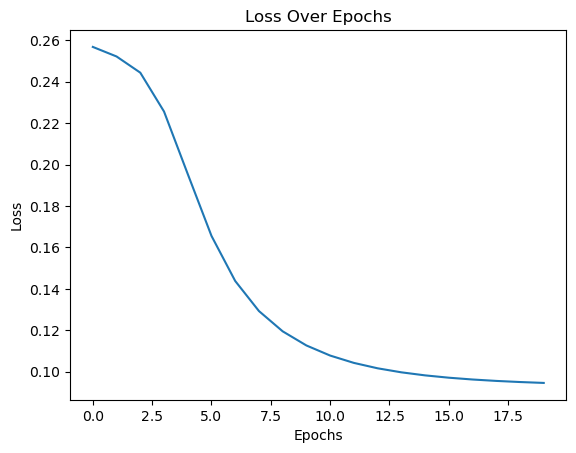

In [22]:
print("Final Weights:")
print("W1 =", weights['W1'])
print("W2 =", weights['W2'])
print("W3 =", weights['W3'])
print("W4 =", weights['W4'])
print("W5 =", weights['W5'])
print("W6 =", weights['W6'])
print("W7 =", weights['W7'])
print("W8 =", weights['W8'])

print("Final Biases:")
print("b1 =", biases['b1'])
print("b2 =", biases['b2'])
print("b3 =", biases['b3'])

print('loss_values =' ,loss_values)
# Plot the loss over epochs
plt.plot(range(epochs), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()
